In [ ]:
# Step 1: Import Required Libraries
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Reshape
from tensorflow.keras import Input
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.optimizers import Adam

In [ ]:
# Step 2: Load and Preprocess the Dataset
(x_train, _), (x_test, _) = fashion_mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0  # Normalize images to the range [0, 1]

# Using a subset for anomaly detection - Consider 'T-shirt/top' as normal, all others as anomalies
normal_data = x_train[:5000]  # Select first 5000 T-shirt/top images
anomalous_data = x_train[5000:5050]  # Select 50 images of other classes

# Reshape for the Autoencoder model
normal_data = normal_data.reshape((-1, 28 * 28))  # Flatten 28x28 images to 784-dimensional vectors
anomalous_data = anomalous_data.reshape((-1, 28 * 28))
x_test = x_test.reshape((-1, 28 * 28))

In [ ]:
# Step 3: Build the Encoder
encoder = Sequential([
    Input(shape=(784,)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),  # Bottleneck layer
])

In [5]:
# Step 4: Build the Decoder
decoder = Sequential([
    Input(shape=(32,)),  # Input is the bottleneck layer from the encoder
    Dense(64, activation='relu'),
    Dense(128, activation='relu'),
    Dense(784, activation='sigmoid'),  # Output has same shape as the original input
])

# Combine Encoder and Decoder to form the Autoencoder
autoencoder = Sequential([encoder, decoder])


In [6]:
# Step 5: Compile the Model
autoencoder.compile(optimizer=Adam(), loss=MeanSquaredError(), metrics=['accuracy'])


In [7]:
# Step 6: Train the Model
history = autoencoder.fit(normal_data, normal_data, epochs=20, batch_size=32, validation_split=0.2)


Epoch 1/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.0044 - loss: 0.1001 - val_accuracy: 0.0040 - val_loss: 0.0462
Epoch 2/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.0078 - loss: 0.0408 - val_accuracy: 0.0140 - val_loss: 0.0311
Epoch 3/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.0123 - loss: 0.0286 - val_accuracy: 0.0090 - val_loss: 0.0267
Epoch 4/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.0137 - loss: 0.0251 - val_accuracy: 0.0170 - val_loss: 0.0252
Epoch 5/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.0114 - loss: 0.0237 - val_accuracy: 0.0180 - val_loss: 0.0239
Epoch 6/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.0112 - loss: 0.0226 - val_accuracy: 0.0180 - val_loss: 0.0228
Epoch 7/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.0150 - loss: 0.0215 - val_accuracy: 0.0060 - val_loss: 0.0220
Epoch 8/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.0150 - loss: 0.0206 - val_accuracy: 0

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step


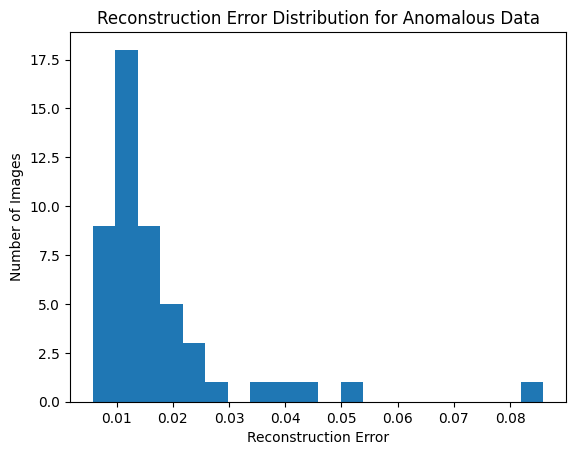

In [8]:
# Step 7: Evaluate and Visualize Reconstruction Loss
reconstructions = autoencoder.predict(anomalous_data)
reconstruction_errors = np.mean(np.square(reconstructions - anomalous_data), axis=1)

# Visualize the Reconstruction Loss of Anomalous Data
plt.hist(reconstruction_errors, bins=20)
plt.xlabel('Reconstruction Error')
plt.ylabel('Number of Images')
plt.title('Reconstruction Error Distribution for Anomalous Data')
plt.show()

In [9]:
# Step 8: Plot Original and Reconstructed Images for Normal and Anomalous Data
def plot_original_vs_reconstructed(data, model, num_images=10):
    # Select a few images to display
    sample_images = data[:num_images]
    reconstructed_images = model.predict(sample_images)
    
    plt.figure(figsize=(15, 4))
    for i in range(num_images):
        # Original Images
        plt.subplot(2, num_images, i + 1)
        plt.imshow(sample_images[i].reshape(28, 28), cmap='gray')
        plt.title("Original")
        plt.axis('off')
        
        # Reconstructed Images
        plt.subplot(2, num_images, num_images + i + 1)
        plt.imshow(reconstructed_images[i].reshape(28, 28), cmap='gray')
        plt.title("Reconstructed")
        plt.axis('off')
    plt.show()

Normal Data Reconstructions:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


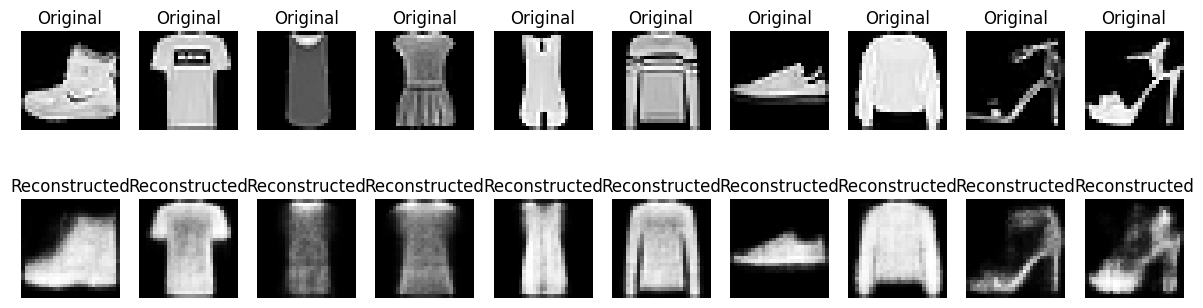

In [10]:
# Display Normal Data Reconstructions
print("Normal Data Reconstructions:")
plot_original_vs_reconstructed(normal_data, autoencoder)

Anomalous Data Reconstructions:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


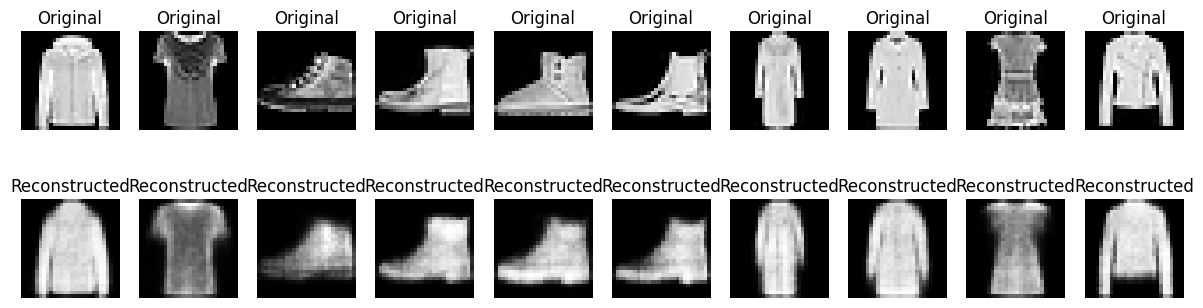

In [11]:
# Display Anomalous Data Reconstructions
print("Anomalous Data Reconstructions:")
plot_original_vs_reconstructed(anomalous_data, autoencoder)

157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


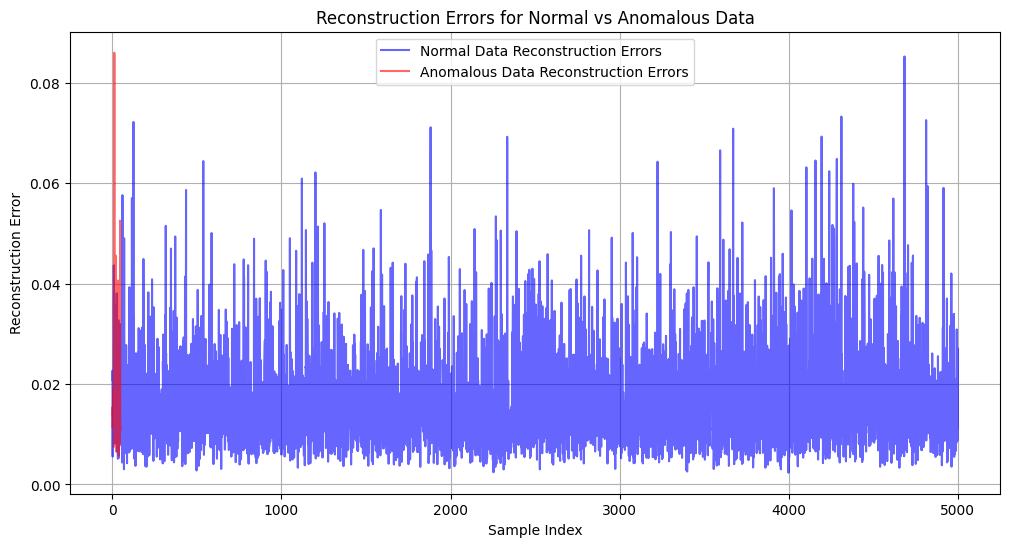

In [12]:
# Step 7: Calculate Reconstruction Errors for Normal Data
normal_reconstructions = autoencoder.predict(normal_data)
normal_reconstruction_errors = np.mean(np.square(normal_reconstructions - normal_data), axis=1)

# Step 8: Plot Reconstruction Errors for Normal vs Anomalous Data
plt.figure(figsize=(12, 6))
plt.plot(normal_reconstruction_errors, label='Normal Data Reconstruction Errors', color='blue', alpha=0.6)
plt.plot(reconstruction_errors, label='Anomalous Data Reconstruction Errors', color='red', alpha=0.6)

# Set labels and title
plt.title('Reconstruction Errors for Normal vs Anomalous Data')
plt.xlabel('Sample Index')
plt.ylabel('Reconstruction Error')
plt.legend()
plt.grid()
plt.show()


In [14]:
# Prepare data for bar graph
labels = ['Normal Data', 'Anomalous Data']
mean_errors = [normal_data, mean_error_anomalous]

# Create the bar graph
plt.figure(figsize=(8, 5))
plt.bar(labels, mean_errors, color=['blue', 'red'])
plt.ylabel('Mean Reconstruction Error')
plt.title('Comparison of Reconstruction Errors')
plt.ylim(0, max(mean_errors) * 1.1)  # Set y-limit for better visibility
plt.show()

NameError: name 'mean_error_anomalous' is not defined